# Applied Machine Learning (2023), exercises


## General instructions for all exercises

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Remove also line 

> raise NotImplementedError()

**Do not change other areas of the document**, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manually graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks are text in markdown format. It may contain text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, validate and submit your solution using the nbgrader tools from the `Nbgrader/Assignment List`-menu.


# Unsupervised learning, clustering

## Task 1: Apply k-means

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

The data-file `liver-spectroscopy.tab` is a text file which contains a Near Infrared Spectral (NIR) measurements of different cells from a liver. The file includes 731 samples, and each one has 234 variables. The variables describes the amount of infrared radiation absorbed in each of the tested 234 wavelengths. The last column in the data is the cell type, which can be one of the four types: 'collagen', 'glycogen', 'lipids' or 'DNA'. The column names are the wavelengths used in measuring the absorbtion values for the specific columns.

In [4]:
D = pd.read_table('liver-spectroscopy.tab')

# Print the classes
print(D.type.unique())

# Separate the true classes out from the data, into separate variable
types=pd.Categorical(D.type)
del(D['type'])

['collagen' 'glycogen' 'lipids' 'DNA']


First task is to apply PCA to transform the data `D` to PCA projection `projected`. Then apply KMeans to `projected` and try to find clusters from the data. Use just enough PCA-components to contain more than 90% of the variance. Name your KMeans object as `kmeans`.

Plot the clusters using PC1 and PC2 axis using scatter plot. Use different color for each cluster in the plot.

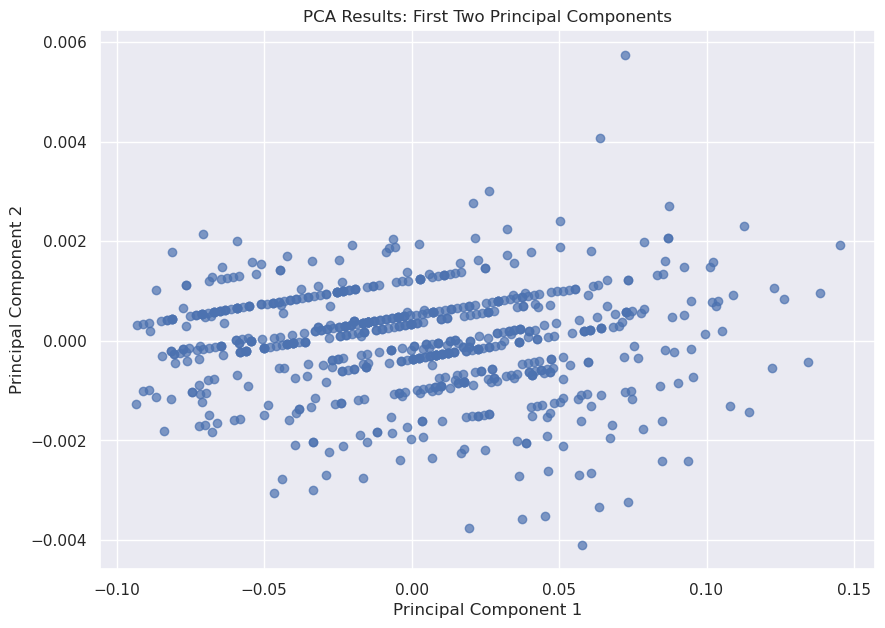

In [5]:
from sklearn.decomposition import PCA

#APPLY PCA
projected = D.iloc[:,:4]
pca = PCA(4)
pca.fit(projected)
Y = pca.transform(projected)
pca = PCA(n_components=0.90) #PCA-COMPONENTS CONTAIN MORE THAN 90% OF THE VARIANCE

#PLOT DIAMITERS
plt.figure(figsize=(10, 7))

#SCATTER THE PLOT FOR PC1 AND PC2
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.7)
plt.title('PCA Results: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



/opt/tljh/user/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


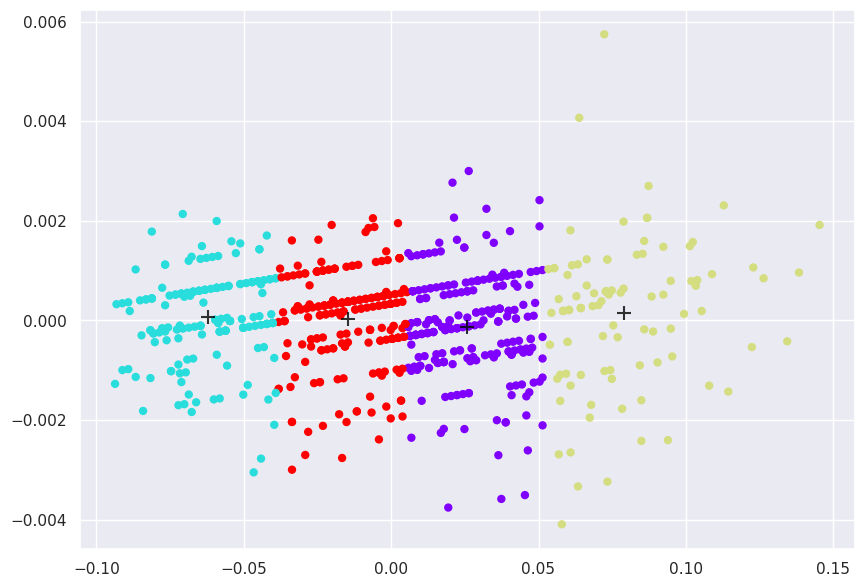

In [6]:
from sklearn.cluster import KMeans

#PLOT DIAMITERS
plt.figure(figsize=(10, 7))

#APPLY KMEANS
kmeans = KMeans(n_clusters=4)
kmeans.fit(Y) #FIT Y (PCA) TO KMEANS
X_kmeans = kmeans.predict(Y) #PREDICT KMEANS
 
#SCATTER THE PLOT
plt.scatter(Y[:, 0], Y[:, 1], c=X_kmeans, s=25, cmap='rainbow')

#SCATTER THE CLUSTER CENTERS
centers = kmeans.cluster_centers_ 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.8, marker='+');

In [ ]:
points=0
if (abs(kmeans.inertia_-75)<5):
    points+=1
points

## Task 2, apply PCA and GMM

Use previous PCA projection and apply Gaussian Mixture Model to projected data and try to find clusters from the data. Use `gmm` as a name for GaussianMixture object.

Plot the clusters with different colors in the scatter plot using PC1 and PC2 axis.

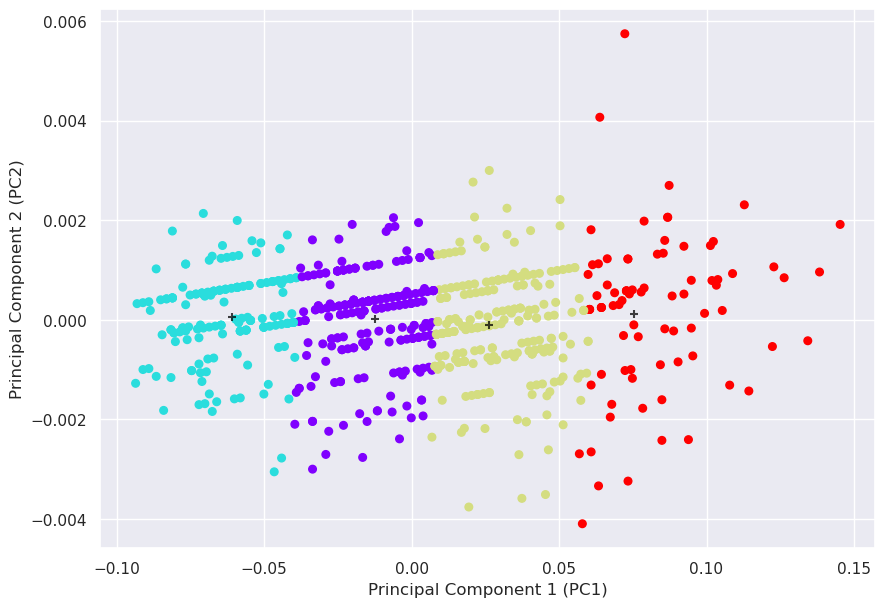

In [44]:
from sklearn.mixture import GaussianMixture as GMM

#APPLY FIGURE DIAMITERS
plt.figure(figsize=(10, 7))

#APPLY GAUSSIAN MIXTURE MODEL
gmm = GMM(n_components=4, random_state=42)

#FIT Y (PCA) TO GMM
gmm.fit(Y)

#PREDICT CLUSTER
clusters = gmm.predict(Y)

#DEFINE SCATTER PLOT TO A VARIABLE
plt.scatter(Y[:, 0], Y[:, 1], c=clusters, s=30, cmap='rainbow')

#MEANS OF GMM
centers = gmm.means_
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')


#MAKE THE SCATTER PLOT 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=30, alpha=0.75, marker='+')
plt.grid(True)
plt.show()

In [ ]:
points=0
points

## Task 3: Confusion matrix

Calculate the confusion matrix `CM` between the clusters and true tissue types. Find from `CM`, the number of the cluster where *DNA* tissue type samples are most often assigned. Assign in variable `nDNA` the number of times the samples of tissue type *DNA* were assigned into this cluster.

Some instructions

1. Find the category number of DNA ny listing `types.categories`. The category number is the index of string 'DNA' in the list of categories.
1. Use `CM=confusion_matrix)=` -function from `sklearn.metrics` to plot the confusion matrix
1. Assign the found number in variable `nDNA`


In [8]:
types.categories

Index(['DNA', 'collagen', 'glycogen', 'lipids'], dtype='object')

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

#APPLY PCA
pca = PCA(n_components=0.90, random_state=42) 

#TRANSFORM ORIGINAL DATA TO PCA
projected = pca.fit_transform(D)

#FIT PCA TO GMM
gmm = GMM(n_components=4, random_state=42)
gmm.fit(projected)

#PREDICT CLUSTER
clusters = gmm.predict(projected)

#CONVERT TISSUE TYPES TO NUMERICAL LABELS
label_encoder = LabelEncoder()
types_encoded = label_encoder.fit_transform(types)

#CALCULATE THECONFUSION MATRIX
CM = confusion_matrix(types_encoded, clusters)

#FIND THE INDEX 'DNA' IN THE UINIQUE VALUES OF TYPES 
dna_index = label_encoder.transform(['DNA'])[0]

#FIND THE CLUSTERS OF 'DNA'
dna_cluster_index = CM[dna_index].argmax()

#INSERT THE FOUND NUMBER VALUE IN nDNA VARIABLE
nDNA = CM[dna_index, dna_cluster_index]


print("Cluster number for DNA samples:", dna_cluster_index)
print("Number of DNA samples in this cluster:", nDNA)


Cluster number for DNA samples: 1
Number of DNA samples in this cluster: 91


In [ ]:
points=0
assert('CM' in globals()), "Define the confusion matrix as CM please!"
assert(type(CM) == np.ndarray), "Confusion matrix is not an numpy array??"
assert('nDNA' in globals()), "Assign nDNA as istructed, please"

points

## Task 3: The probability of the samples

The GMM model includes the function called `.predict_proba()` which returns the probability that a certain sample belongs to different clusters. Calculate the probabilities of each sample belongin to each cluster and assign the result in variable `P`. Then find out the proability that the last sample belongs in the cluster where most DNA samples belong to, and assign that probability in variable `pDNA`.

In [31]:
gmm = GaussianMixture(n_components=4, random_state=42)

#FIT PROJECTED (pca) TO GMM MODEL
gmm.fit(projected)
proba = gmm.predict_proba(projected)

#ASSIGN THE LAST SAMPLE WHERE MOST DNA SAMPLES BELONG TO
pDNA = P[-1, dna_cluster_index]

print("Probability that the last sample belongs to the DNA cluster:", pDNA)

Probability that the last sample belongs to the DNA cluster: 0.995672334748868


In [ ]:
points=0
assert('P' in globals()), "Define probabilities, P as instructed, please."
assert('pDNA' in globals()), "Define probability, pDNA as instructed, please."
points+=1
points

## Task 4: Evaluation

1. Which clustering method, KMeans or GMM is better for this case and why?
1. How can the quality of the clustering methods be assessed if 
    1. the true classes are known?
    1. the true classes are not known?
    
Answer by writing text or Markdown text in the cell below.

YOUR ANSWER HERE

In [24]:
#1. KMeans is good if the clusters are spherical and equally sized. It tends to find cluster of simimar size. GMM can find clusters of different sizes, shapes and orientations. GMM is slower than slower than KMeans.

In [25]:
#1. I think that in this case KMeans was better because the data had similar shape between the clusters

In [28]:
#2 A. In this exercise if the true classes are known. Confusion matrix was used the with table to describe the performance of a classification algorithm. In the context of clustering, it can show you how samples from each true class were distributed across the found clusters

In [27]:
#2 A. Also good methods to use are: adjusted rand index, normalized mutual informatiom. fowlkes-mallows index

In [29]:
#2 B. Without ground truth labels, the assessment of clustering quality relies on internal validation metrics, which measure the goodness of a clustering structure without reference to external information. Some common internal validation metrics include:

In [30]:
# B. Methods to use if true classes are not known: sihluette score, davies-boulding index, inertia